## SI 670 Applied Machine Learning, Week 3: Regularization, Cross Validation, and Logistic Regression

For this assignment, you will be exercising on questions related to Logistic regression, Dummy classifiers, and cross-validation.

* The coding homework is worth 50 points in total. Correct answers and code receive full credit, but partial credit will be awarded if you have the right idea even if your final answers aren't quite right.

* Submit your completed notebook file to the Canvas site - **IMPORTANT**: please name your submitted file `si670f23-hw3-youruniqname.ipynb`

* Any file submitted after the deadline will be marked as late. Please consult the syllabus regarding late submission policies. You can submit the homework as many time as you want, but only your latest submission will be graded.

* As a reminder, the notebook code you submit must be your own work. Feel free to discuss general approaches to the homework with classmates. If you end up forming more of a team discussion on multiple questions, please include the names of the people you worked with at the top of your notebook file.



In [2]:
import sklearn

### Question 1 (20 points) Bias and Variance


Your task is to investigate the influence of different regularization parameters on the coefficients of a regression model.

Given 10 points around the function $y = x^2 + 2x + 1$. You are asked to train a linear regression with degree 6 polynomial features. And run it with different regularization parameters $\alpha \in \{0,0.1,1,10,100\}$.

Plot the polynomials from your regression results corresponding to each regularization parameter in one figure.


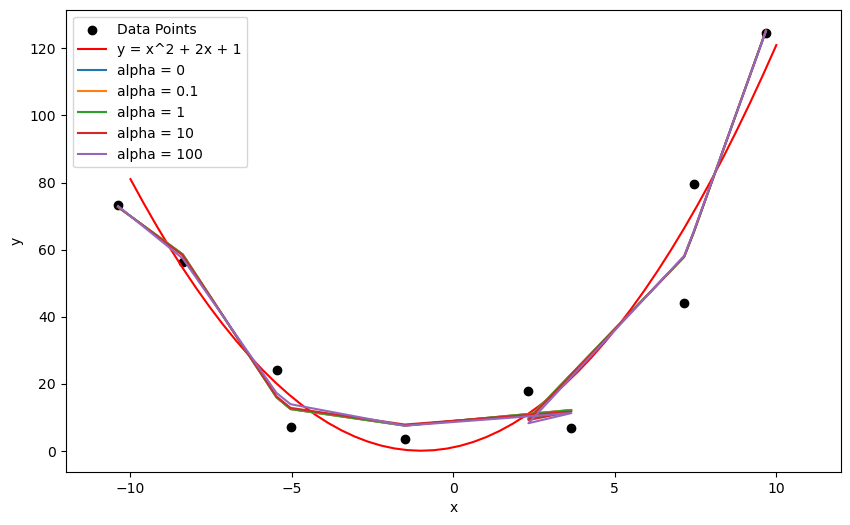

In [4]:
def answer_1():
    import numpy as np
    from sklearn.linear_model import LinearRegression, Ridge
    import matplotlib.pyplot as plt

    x_list = [-10.38446879, -8.38394902, -5.47700112, -5.04337481, -1.50548227, 3.65324449, 2.32253022, 7.14588818, 7.44347003, 9.67771813]
    y_list = [ 73.21995367, 56.4250573, 24.15989601, 7.14325154, 3.45955269, 6.68448382, 17.93465674, 44.02585723, 79.55124013, 124.46649205]

    # Your code here
    poly = sklearn.preprocessing.PolynomialFeatures(6)
    x_poly = poly.fit_transform(np.array(x_list).reshape(-1, 1))
    
    alpha_0 = Ridge(alpha = 0).fit(x_poly, np.array(y_list).reshape(-1, 1))
    alpha_01 = Ridge(alpha = 0.1).fit(x_poly, np.array(y_list).reshape(-1, 1))
    alpha_1 = Ridge(alpha = 1).fit(x_poly, np.array(y_list).reshape(-1, 1))
    alpha_10 = Ridge(alpha = 10).fit(x_poly, np.array(y_list).reshape(-1, 1))
    alpha_100 = Ridge(alpha = 100).fit(x_poly, np.array(y_list).reshape(-1, 1))
    

    # Generate original x values
    x_original = np.linspace(-10, 10)

    # Generate y values based on the function y = x^2 + 2x + 1
    y_original = x_original**2 + 2*x_original + 1

    # Plot the original function and the data
    plt.figure(figsize=(10, 6))
    plt.scatter(x_list, y_list, label='Data Points', color='black')

    # Plot y = x^2 + 2x + 1
    plt.plot(x_original, y_original, label='y = x^2 + 2x + 1', color='red')

    # Plot the polynomials from your regression results here
    
    for alpha, reg in [(0, alpha_0), (0.1, alpha_01), (1, alpha_1), (10, alpha_10), (100, alpha_100)]:
        y_plt = reg.predict(x_poly)
        plt.plot(x_list, y_plt, label = f"alpha = {alpha}")

    plt.xlabel('x')
    plt.ylabel('y')
    plt.xlim(-12, 12)
    plt.legend()
    plt.show()

answer_1()

We then give you a data generator that gives 10 data points around the function $y = x^2 + 2x + 1$ each time.

Train a linear regression with degree 6 polynomial features for 1000 times to calculate the bias and variance.

Apply different regularization parameters $\alpha \in \{0,0.1,1,10,100\}$

return a tuple containing two lists:

The first list should contain the bias values at $x^*=0, y^*=1$ corresponding to each regularization parameter. The second list should contain the variance values at $x^*=0, y^*=1$ corresponding to each regularization parameter.

Briefly describe how the bias and variance change when the regularization parameter increases.

In [5]:
import numpy as np

def data_gen():
    # Number of data points
    n = 10

    # Generate original x values: you can choose the range and number of points
    x_original = np.linspace(-10, 10, n)

    # Generate y values based on the function y = x^2 + 2x + 1
    y_original = x_original**2 + 2*x_original + 1

    # Add some noise to x and y values
    noise_strength_x = 1.0  # Control the noise strength for x
    noise_strength_y = 5.0  # Control the noise strength for y

    x_noisy = x_original + noise_strength_x * np.random.randn(n)
    y_noisy = y_original + noise_strength_y * np.random.randn(n)

    return x_noisy, y_noisy


def answer_1_1():
    import numpy as np
    from sklearn.linear_model import LinearRegression, Ridge

    bias_list = []
    variance_list = []
    

    # your code here
    x_calc = 0
    y_calc = 1
    
    alpha_0_bias = []
    alpha_0_variance = []
    for i in range(200):
        x, y = data_gen()
        
        poly = sklearn.preprocessing.PolynomialFeatures(6)
        x_poly = poly.fit_transform(np.array(x).reshape(-1, 1))
 
        ridge = Ridge(alpha = 0).fit(x_poly, y)
        
        x_calc_poly = poly.transform(np.array(x_calc).reshape(1, -1))
        pred = ridge.predict(x_calc_poly)
        sample_mean = np.mean(x)
        variance = (pred - sample_mean) ** 2 

        alpha_0_bias.append(pred - y_calc)
        alpha_0_variance.append(variance)
    
    bias_list.append(alpha_0_bias)
    variance_list.append(alpha_0_variance)
        
        
    alpha_01_bias = []
    alpha_01_variance = []
    for i in range(200):
        x, y = data_gen()
        
        poly = sklearn.preprocessing.PolynomialFeatures(6)
        x_poly = poly.fit_transform(np.array(x).reshape(-1, 1))
 
        ridge = Ridge(alpha = 0.1).fit(x_poly, y)
        
        x_calc_poly = poly.transform(np.array(x_calc).reshape(1, -1))
        pred = ridge.predict(x_calc_poly)
        sample_mean = np.mean(x)
        variance = (pred - sample_mean) ** 2 

        alpha_01_bias.append(pred - y_calc)
        alpha_01_variance.append(variance)
        
    bias_list.append(alpha_01_bias)
    variance_list.append(alpha_01_variance)
        
        
    alpha_1_bias = []
    alpha_1_variance = []
    for i in range(200):
        x, y = data_gen()
        
        poly = sklearn.preprocessing.PolynomialFeatures(6)
        x_poly = poly.fit_transform(np.array(x).reshape(-1, 1))
 
        ridge = Ridge(alpha = 1).fit(x_poly, y)
        
        x_calc_poly = poly.transform(np.array(x_calc).reshape(1, -1))
        pred = ridge.predict(x_calc_poly)
        sample_mean = np.mean(x)
        variance = (pred - sample_mean) ** 2 

        alpha_1_bias.append(pred - y_calc)
        alpha_1_variance.append(variance)
        
    bias_list.append(alpha_1_bias)
    variance_list.append(alpha_1_variance)
        
        
    alpha_10_bias = []
    alpha_10_variance = []
    for i in range(200):
        x, y = data_gen()
        
        poly = sklearn.preprocessing.PolynomialFeatures(6)
        x_poly = poly.fit_transform(np.array(x).reshape(-1, 1))
 
        ridge = Ridge(alpha = 10).fit(x_poly, y)
        
        x_calc_poly = poly.transform(np.array(x_calc).reshape(1, -1))
        pred = ridge.predict(x_calc_poly)
        sample_mean = np.mean(x)
        variance = (pred - sample_mean) ** 2 

        alpha_10_bias.append(pred - y_calc)
        alpha_10_variance.append(variance)
        
    bias_list.append(alpha_10_bias)
    variance_list.append(alpha_10_variance)
        
        
    alpha_100_bias = []
    alpha_100_variance = []
    for i in range(200):
        x, y = data_gen()
        
        poly = sklearn.preprocessing.PolynomialFeatures(6)
        x_poly = poly.fit_transform(np.array(x).reshape(-1, 1))
 
        ridge = Ridge(alpha = 100).fit(x_poly, y)
        
        x_calc_poly = poly.transform(np.array(x_calc).reshape(1, -1))
        pred = ridge.predict(x_calc_poly)
        sample_mean = np.mean(x)
        variance = (pred - sample_mean) ** 2 

        alpha_100_bias.append(pred - y_calc)
        alpha_100_variance.append(variance)
    
    bias_list.append(alpha_100_bias)
    variance_list.append(alpha_100_variance)

    return bias_list, variance_list

bias, variance = answer_1_1()

In [6]:
mean_bias = [np.mean(b) for b in bias]
mean_variance = [np.mean(v) for v in variance]

In [9]:
median_bias = [np.median(b) for b in bias]
median_variance = [np.median(v) for v in variance]

In [7]:
mean_bias, mean_variance

([1.1493768674406268,
  0.1721309622685306,
  0.0014467696790451611,
  0.7416396178534762,
  2.7884462483010295],
 [323.7924665020688,
  35.11491941140106,
  40.84049312407622,
  27.097188387354407,
  27.52738800108642])

In [10]:
median_bias, median_variance

([-0.17873093701956222,
  0.8357024565321431,
  0.8944795490540756,
  1.2352670896547195,
  2.962185950825752],
 [15.325452697818974,
  14.726142991641229,
  14.40605470121968,
  13.54331282794282,
  16.25685555321037])

There was a tradeoff between bias and variance in ridge regression. Higher values of alpha penalize the regression more for being complex and reduce variance. When alpha was set at 0, variance was 324, but when alpha was equal to 100, the variance was just 27.5. Howeever, whenn alpha was 100 we also had the greatest bias. Therefore, we can see that regularized regression reduces variance, but at the expense of bias. 

### Question 2 (15 points) Cross-validation for very small datasets.

We talked about splitting data in training/validation/test.  However, when you have a very small dataset, one issue is that it leads to really tiny validation/test sets, which leads to unreliable test evaluation scores. For example, if you have a dataset with a total of 60 samples, and hold back 25% as a final test set, you'll get a final test set with 15 samples. In this case, a single evaluation score based on merely 15 samples could be very unreliable and probably not something to be relied on heavily.

So to make evaluation more reliable, we discussed how people usually use *cross-validation* to generate *multiple* evaluation scores, each on a different train/test split of the data. That is, you split the train and test set multiple times and then calculate the average of the resulting test scores. This is the approach we'll use to estimate a more reliable final test set score.  We don't want to use these final test sets to also tune our hyperparameters, so we make sure to learn the model and tune the hyperparameters using only the data in the training split.  To do that, we do a second cross-validation *within the training data split* so that we have (i) an outer test set and (ii) a separate in cross-validation that produces several inner *training/validation split's* that's used to pick the best configuration/hyper-parameters.

Use an outer cross validation with $k=5$ folds, and an inner cross-validation with $k'=3$ folds.  Report the average of the final test set scores you got across all $k=5$ folds.  

To simulate a small dataset scenario, we have provided the code that selects the first 60 samples from the built-in diabetes dataset (https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_diabetes.html). We've also given you the variable 'alpha_list', which has the range of ridge regression hyperparameter alphe you should use for tuning.

Write the code that implements the above scheme on this subset of the boston dataset. You can split the whole dataset into $k=5$ outer folds (step 1) by using the handy `KFold` function (https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html). In each outer fold, you can then use another `KFold` to split the training data of the outer fold into $k'=3$ inner folds (step 2). In each inner fold, train a Ridge regression model, and use the validation set to evaluate (step 2a). Then you can find the optimal hyper-parameter alpha value within each outer fold (step 2b). Get the final test set score using this optimal model (step 2c). Repeat for all $k=5$ folds to obtain a set of final test scores. (step 3)

Finally, you need to return the mean value of the $k=5$ final test scores. This is your final (more reliable) test set prediction.

In [ ]:
def answer_2():
    from sklearn.datasets import load_diabetes
    from sklearn.linear_model import Ridge
    from sklearn.model_selection import train_test_split
    from sklearn.model_selection import KFold

    X,y = load_diabetes(return_X_y=True)
    X=X[:60,:]
    y=y[:60]
    alpha_list = [0.001,0.01,0.1,1,10]

    # Your code here
    mean_test_score = []
    kf = KFold(n_splits = 5)
    for i, (train_idx, test_idx) in enumerate(kf.split(X)):
        kf_prime = KFold(n_splits = 3)
        
        X_train = X[train_idx]
        y_train = y[train_idx]
        X_test = X[test_idx]
        y_test = y[test_idx]

        for j, (train_prime_idx, val_prime_idx) in enumerate(kf_prime.split(X_train)):
            X_train_prime = X_train[train_prime_idx]
            y_train_prime = y_train[train_prime_idx]
            X_val_prime = X_train[val_prime_idx]
            y_val_prime = X_train[val_prime_idx]
            
            model = Ridge(alpha_list[i]).fit(X_train_prime, y_train_prime) 
            val_predidictions = model.predict(X_val_prime)
            
            s

    return mean_test_score

answer_2()

### Question 3 (15 points) Regression to the mean

Imagine you are working on a regression problem with three features.

You will:

1. Generate synthetic data.

2. Split data into training, validation, and test sets, with a ratio of 6:2:2

3. Train two different linear regression models (one with Ridge regularization term with $\alpha = 0.2$ and the other without).

4. Evaluate both models on the validation data with Mean Squared Error.

5. Suppose that for each time you will apply the "better" model according to the MSE on the validation data, evaluate it on the test data.

Repeat this 1000 times.  Each time calculate the average of the error of the "better" model on validation data and test data respectively (so you will only record the error of the better model on the validation data, and the error of this same model on the test data.

Which average error is smaller? Why do you expect this (or not expect this)?

In [ ]:
import numpy as np
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

def answer_3():
    avg_val_error = []
    avg_test_error = []

    for _ in range(1000):

        # Generate synthetic data
        X = 2 * np.random.rand(50, 6)  # 50 samples, 6 features
        y = 10 + np.dot(X, np.array([3, 5, 2, 0, 0, 0])) + 2 * np.random.randn(50)

        # Your code here
        # Split data into training, validation, and test sets, with a ratio of 6:2:2
        
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = 42)
        X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size = 0.5)



        # Train two models
        # Model 1: Linear Regression
        linreg = LinearRegression().fit(X_train, y_train)


        # Model 2: Ridge Regression with alpha = 0.2
        ridge = Ridge(alpha = 0.2).fit(X_train, y_train)


        # Evaluate on validation set
        linreg_predictions = linreg.predict(X_val)
        ridge_predictions = ridge.predict(X_val)
        
        val_mse1 = mean_squared_error(linreg_predictions, y_val)
        val_mse2 = mean_squared_error(ridge_predictions, y_val)

        print(f"Validation MSE for Linear Regression: {val_mse1}")
        print(f"Validation MSE for Ridge Regression: {val_mse2}")

        # Choose the "better" model based on validation MSE
        choice, choice_mse = (linreg, val_mse1) if val_mse1 < val_mse2 else (ridge, val_mse2)


        # Evaluate 'better' model on the test set
        better_predictions = choice.predict(X_test)
        test_mse = mean_squared_error(better_predictions, y_test)

        print(f"Test MSE for the 'better' model: {test_mse}")
        
        avg_test_error.append(test_mse)
        avg_val_error.append(choice_mse)
        
    
    return (stayed_best, worse, np.mean(avg_test_error), np.mean(avg_val_error))


stayed_best, worse, avg_test_error, avg_val_error = answer_3()

In [ ]:
avg_test_error, avg_val_error

The average test error is larger than the average validation error. This is likely because of regression to the mean. Whennever we're comparing two classifiers performance, we generally expect the better performing classifier to do worse in subsequent evaluations. In fact, the estimate of the best predictor will likely be upwardly biased.

Whenever, we train a classifier, there is some degree of signal and noise in our estimate. Often, noise can cause a classifier to overperform and lead us to think it has a higher accuracy than it actually does. But when noise is removed, top-performing classifiers tend to regress toowards the mean. In other words, we may get lucky and achieve very high accuracy with a classifier sometimes, but we know we won't always be lucky — with subsequent evaluations, our average performance will converge back to the expected value. 

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from collections import Counter

doc1 = ['i', 'am', 'haley', 'haley']
doc2 = ['other', 'haley']
doc3 = ['else']
query = ['am', 'haley']

In [ ]:
doc_word_counts = {'am': 1, 'haley': 2}
doc_freq_counts = {'am': 1, 'haley': 2}
query_word_counts = Counter(query)

In [ ]:
N = 3

doc_vec = {k: float( (1 + np.log(doc_word_counts[k])) / (N/np.log(doc_freq_counts[k])) ) for k in doc_word_counts.keys() & doc_freq_counts}

In [ ]:
doc_vec

In [ ]:
(1 + np.log(2)) / (3 / np.log(2))

In [ ]:
os.listdir()

In [ ]:
stopwords = []
with open("stopwords.txt") as f:
    line = f.readline()
    while line:
        stopwords.append(line.strip())
        line = f.readline()